In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
import pandas as pd
from scipy.interpolate import make_interp_spline, BSpline, make_lsq_spline
from scipy.optimize import curve_fit

In [3]:
pruning_filename = './../eval_results/mnist/eval_mnist_pruning.csv'
pruning_quant_filename = './../eval_results/mnist/eval_mnist_pruning_quant.csv'
quant_filename = './../eval_results/mnist/eval_mnist_quant.csv'

In [4]:
pruning_data = pd.read_csv(pruning_filename, decimal=',')
pruning_quant_data = pd.read_csv(pruning_quant_filename, decimal=',')
quant_data = pd.read_csv(quant_filename, decimal=',')

In [5]:
print(pruning_data)

    sparsity_level  accuracy  params_set_to_0  size_mb_after_huffman  \
0             0.00     0.968          3274588                 12.100   
1             0.10     0.968          2948261                 11.300   
2             0.20     0.971          2621938                 10.300   
3             0.30     0.965          2295611                  9.200   
4             0.40     0.966          1969288                  8.100   
5             0.50     0.969          1642966                  7.000   
6             0.60     0.965          1316643                  5.800   
7             0.70     0.953           990322                  4.600   
8             0.80     0.934           663999                  3.200   
9             0.84     0.740           533474                  2.700   
10            0.90     0.380           337687                  1.800   
11            0.98     0.234            76633                  0.502   

    avg_inference_time  compression_ratio  Unnamed: 6         f

In [6]:
pruning_data['accuracy_loss'] = pruning_data['accuracy']
pruning_data['accuracy_loss'] -= pruning_data['accuracy'][0]

In [7]:
# pruning_data = pruning_data.sort_values('Compression %')
# print(pruning_data)

In [8]:
print(pruning_quant_data)

   bits  accuracy  size_mb_after_huffman  quant_time  avg_step_time  \
0     2     0.665                    1.2        3.48           1.42   
1     3     0.893                    1.8        5.35           2.13   
2     4     0.963                    2.2        9.03           3.33   
3     5     0.951                    2.5       12.01           5.84   
4     6     0.964                    2.8       19.68          10.45   
5     7     0.967                    3.1       35.04          19.53   
6     8     0.963                    3.3       67.27          38.61   

   compression_ratio  
0           9.917355  
1          14.876033  
2          18.181818  
3          20.661157  
4          23.140496  
5          25.619835  
6          27.272727  


In [9]:
pruning_quant_data['accuracy_loss'] = pruning_quant_data['accuracy']
pruning_quant_data['accuracy_loss'] = pruning_data['accuracy'][0] - pruning_quant_data['accuracy']

In [10]:
print(pruning_data['accuracy_loss'].to_numpy())

[ 0.     0.     0.003 -0.003 -0.002  0.001 -0.003 -0.015 -0.034 -0.228
 -0.588 -0.734]


In [11]:
quant_data['accuracy_loss'] = quant_data['accuracy']
quant_data['accuracy_loss'] = pruning_data['accuracy'][0] - quant_data['accuracy']

In [12]:
print(quant_data)

   bits  accuracy  size_mb_after_huffman  quant_time  avg_step_time  \
0     4     0.955                    2.4        8.23           3.67   
1     5     0.964                    2.9       10.82           6.21   
2     6     0.967                    3.3       17.69          10.86   
3     7     0.951                    4.3       31.32          16.70   
4     8     0.967                    4.9       60.24          38.79   

   compression_ratio  accuracy_loss  
0          19.834711          0.013  
1          23.966942          0.004  
2          27.272727          0.001  
3          35.537190          0.017  
4          40.495868          0.001  


In [13]:
# accuracy_loss = pruning_data['accuracy_loss'].to_numpy()
# compression_line =  pruning_data['Compression %'].to_numpy()

# xnew = np.linspace(0, 10, 300) #300 represents number of points to make between T.min and T.max

# spl = make_interp_spline(compression_line, accuracy_loss, k=2) #BSpline object
# power_smooth = spl(xnew)

# # plt.ylim((-1, 0.5))
# plt.plot(xnew,power_smooth)
# plt.plot(compression_line, accuracy_loss, 'bo')
# plt.show()

In [14]:
# def func(x, a, b, c):
#     return a * np.exp(b * x) + c
# popt, pcov = curve_fit(func, accuracy_loss, compression_line)

# vals = []
# c = np.linspace(0, 0.5, 100)
# for v in c:
#     vals.append(func(v, *popt))
    
#     plt.xlim((-0.1, 0.1))
# plt.ylim((0, 1.2))
# # plt.plot(c, vals)
# # plt.plot(accuracy_loss, compression_line, 'bo')

In [15]:
def func(x, a, b, c, d):
    return a*np.exp(c*1/x * 2) + d

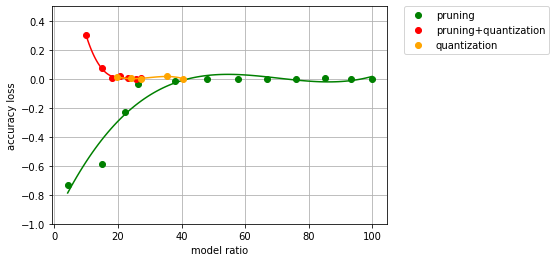

In [16]:
# plot points
fig, ax = plt.subplots()

ax.grid()
poly = np.polyfit(pruning_data['compression_ratio'], pruning_data['accuracy_loss'], 3)
# popt, pcov = curve_fit(func, pruning_data['compression_ratio'], pruning_data['accuracy_loss'])
x = np.linspace(pruning_data['compression_ratio'].min(), pruning_data['compression_ratio'].max(), 100)
p = np.poly1d(poly)
# y = func(x, *popt)
plt.plot(x, p(x), color='green')
plt.plot(pruning_data['compression_ratio'], pruning_data['accuracy_loss'], 'bo', color='green', label='pruning')

poly = np.polyfit(pruning_quant_data['compression_ratio'], pruning_quant_data['accuracy_loss'], 3)
x = np.linspace(pruning_quant_data['compression_ratio'].min(), pruning_quant_data['compression_ratio'].max(), 100)
p = np.poly1d(poly)
plt.plot(x, p(x), color='red')
plt.plot(pruning_quant_data['compression_ratio'], pruning_quant_data['accuracy_loss'], 'bo', color='red', label='pruning+quantization')

poly = np.polyfit(quant_data['compression_ratio'], quant_data['accuracy_loss'], 3)
x = np.linspace(quant_data['compression_ratio'].min(), quant_data['compression_ratio'].max(), 100)
p = np.poly1d(poly)
plt.plot(x, p(x), color='orange')
plt.plot(quant_data['compression_ratio'], quant_data['accuracy_loss'], 'bo', color='orange', label='quantization')
plt.ylim((-1, 0.5))

plt.xlabel('model ratio')
plt.ylabel('accuracy loss')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)

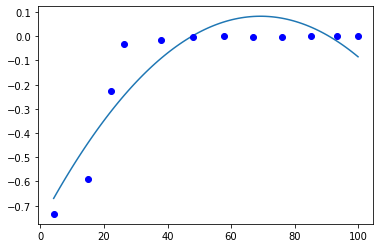

In [17]:
poly = np.polyfit(pruning_data['compression_ratio'], pruning_data['accuracy_loss'], 2)
x = np.linspace(pruning_data['compression_ratio'].min(), pruning_data['compression_ratio'].max(), 100)
p = np.poly1d(poly)
plt.figure()
plt.plot(x, p(x))
plt.plot(pruning_data['compression_ratio'], pruning_data['accuracy_loss'], 'bo')


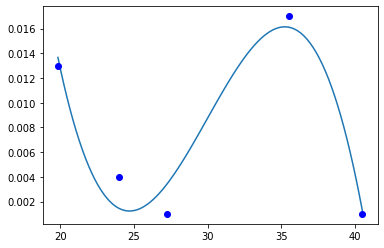

In [18]:
poly = np.polyfit(quant_data['compression_ratio'], quant_data['accuracy_loss'], 3)
x = np.linspace(quant_data['compression_ratio'].min(), quant_data['compression_ratio'].max(), 100)
p = np.poly1d(poly)
plt.figure()
plt.plot(x, p(x))
plt.plot(quant_data['compression_ratio'], quant_data['accuracy_loss'], 'bo')


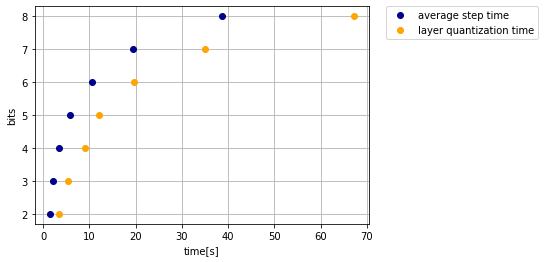

In [19]:
# plot time step points
fig, ax = plt.subplots()

ax.grid()
plt.plot(pruning_quant_data['avg_step_time'], pruning_quant_data['bits'], 'bo', color='darkblue', label='average step time')
plt.plot(pruning_quant_data['quant_time'], pruning_quant_data['bits'], 'bo', color='orange', label='layer quantization time')
# plt.plot(quant_data['compression_ratio'], quant_data['accuracy_loss'], 'bo', color='orange', label='quantization')
plt.xlabel('time[s]')
plt.ylabel('bits')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)

In [20]:
bits = [32, 8, 7, 6, 5, 4]
lr = [0.005, 0.001, 0.0008, 0.0002, 0.0001, 0.0001]

Text(0, 0.5, 'learning rate')

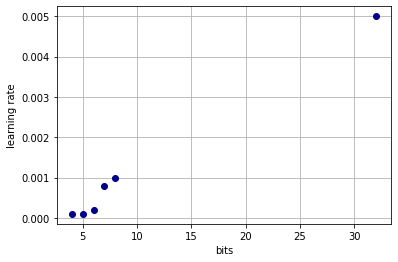

In [21]:
# plot time step points
fig, ax = plt.subplots()

ax.grid()
plt.plot(bits, lr, 'bo', color='darkblue')
plt.xlabel('bits')
plt.ylabel('learning rate')

In [22]:
threshold_filename = './../eval_results/mnist/eval_mnist_pruning_threshold.csv'

In [23]:
threshold_data = pd.read_csv(threshold_filename, decimal=',')

In [24]:
threshold_data['accuracy_loss'] = threshold_data['accuracy']
threshold_data['accuracy_loss'] -= pruning_data['accuracy'][0]

In [25]:
print(threshold_data)

   threshold_val  accuracy  params_set_to_0  size_mb_after_huffman  \
0          0.010     0.970          2323583                  9.300   
1          0.020     0.965          1379803                  6.100   
2          0.030     0.965           435733                  2.400   
3          0.035     0.878            36100                  0.768   
4          0.040     0.470            19458                  0.831   

   compression_ratio  accuracy_loss  
0          76.859504          0.002  
1          50.413223         -0.003  
2          19.834711         -0.003  
3           6.347107         -0.090  
4           6.867769         -0.498  


/home/oanaucs/virtualenvs/py_3.6_tf_1.5/lib/python3.6/site-packages/ipykernel_launcher.py:5: RankWarning: Polyfit may be poorly conditioned
  """
No handles with labels found to put in legend.


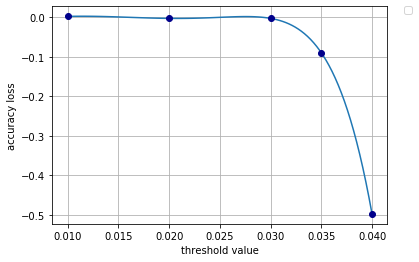

In [26]:
# plot points
fig, ax = plt.subplots()

ax.grid()
poly = np.polyfit(threshold_data['threshold_val'], threshold_data['accuracy_loss'], 8)
x = np.linspace(threshold_data['threshold_val'].min(), threshold_data['threshold_val'].max(), 100)
p = np.poly1d(poly)
plt.plot(x, p(x))
plt.plot(threshold_data['threshold_val'], threshold_data['accuracy_loss'], 'bo', color='darkblue')
plt.xlabel('threshold value')
plt.ylabel('accuracy loss')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)

No handles with labels found to put in legend.


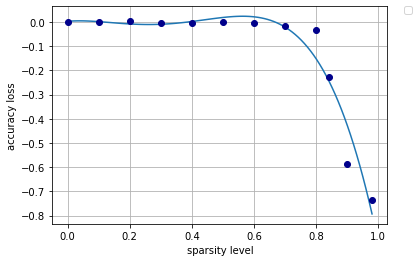

In [27]:
# plot points
fig, ax = plt.subplots()

ax.grid()
poly = np.polyfit(pruning_data['sparsity_level'], pruning_data['accuracy_loss'], 4)
x = np.linspace(pruning_data['sparsity_level'].min(), pruning_data['sparsity_level'].max(), 100)
p = np.poly1d(poly)
plt.plot(x, p(x))
plt.plot(pruning_data['sparsity_level'], pruning_data['accuracy_loss'], 'bo', color='darkblue')
plt.xlabel('sparsity level')
plt.ylabel('accuracy loss')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)

No handles with labels found to put in legend.


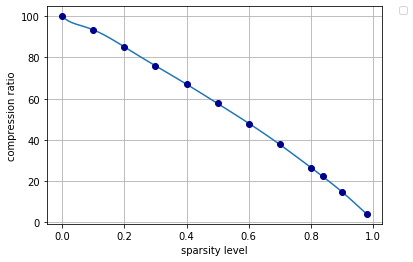

In [28]:
# plot points
fig, ax = plt.subplots()

ax.grid()
poly = np.polyfit(pruning_data['sparsity_level'], pruning_data['compression_ratio'], 10)
x = np.linspace(pruning_data['sparsity_level'].min(), pruning_data['sparsity_level'].max(), 100)
p = np.poly1d(poly)
plt.plot(x, p(x))
plt.plot(pruning_data['sparsity_level'], pruning_data['compression_ratio'], 'bo', color='darkblue')
plt.xlabel('sparsity level')
plt.ylabel('compression ratio')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)

No handles with labels found to put in legend.


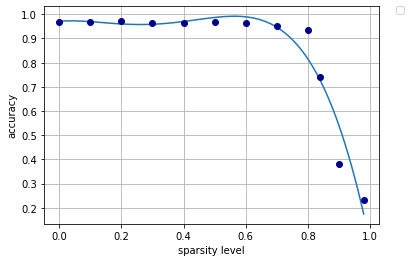

In [29]:
# plot points
fig, ax = plt.subplots()

ax.grid()
poly = np.polyfit(pruning_data['sparsity_level'], pruning_data['accuracy'], 4)
x = np.linspace(pruning_data['sparsity_level'].min(), pruning_data['sparsity_level'].max(), 100)
p = np.poly1d(poly)
plt.plot(x, p(x))
plt.plot(pruning_data['sparsity_level'], pruning_data['accuracy'], 'bo', color='darkblue')
plt.xlabel('sparsity level')
plt.ylabel('accuracy')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)

/home/oanaucs/virtualenvs/py_3.6_tf_1.5/lib/python3.6/site-packages/ipykernel_launcher.py:5: RankWarning: Polyfit may be poorly conditioned
  """
No handles with labels found to put in legend.


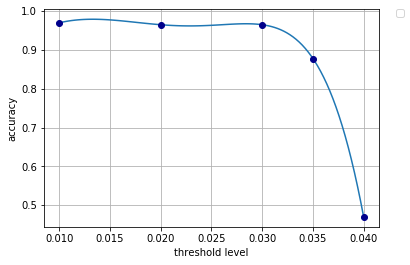

In [30]:
# plot points
fig, ax = plt.subplots()

ax.grid()
poly = np.polyfit(threshold_data['threshold_val'], threshold_data['accuracy'], 6)
x = np.linspace(threshold_data['threshold_val'].min(), threshold_data['threshold_val'].max(), 100)
p = np.poly1d(poly)
plt.plot(x, p(x))
plt.plot(threshold_data['threshold_val'], threshold_data['accuracy'], 'bo', color='darkblue')
plt.xlabel('threshold level')
plt.ylabel('accuracy')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)

No handles with labels found to put in legend.


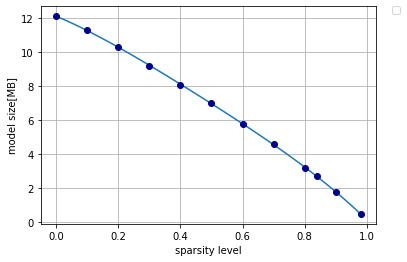

In [31]:
# plot points
fig, ax = plt.subplots()

ax.grid()
poly = np.polyfit(pruning_data['sparsity_level'], pruning_data['size_mb_after_huffman'], 4)
x = np.linspace(pruning_data['sparsity_level'].min(), pruning_data['sparsity_level'].max(), 100)
p = np.poly1d(poly)
plt.plot(x, p(x))
plt.plot(pruning_data['sparsity_level'], pruning_data['size_mb_after_huffman'], 'bo', color='darkblue')
plt.xlabel('sparsity level')
plt.ylabel('model size[MB]')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)

No handles with labels found to put in legend.


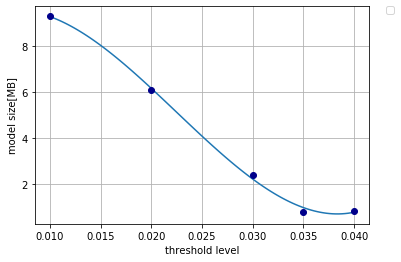

In [32]:
# plot points
fig, ax = plt.subplots()

ax.grid()
poly = np.polyfit(threshold_data['threshold_val'], threshold_data['size_mb_after_huffman'], 3)
x = np.linspace(threshold_data['threshold_val'].min(), threshold_data['threshold_val'].max(), 100)
p = np.poly1d(poly)
plt.plot(x, p(x))
plt.plot(threshold_data['threshold_val'], threshold_data['size_mb_after_huffman'], 'bo', color='darkblue')
plt.xlabel('threshold level')
plt.ylabel('model size[MB]')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)

No handles with labels found to put in legend.


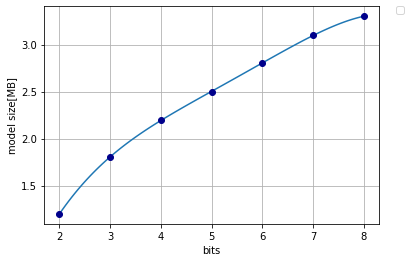

In [33]:
# plot points
fig, ax = plt.subplots()

ax.grid()
poly = np.polyfit(pruning_quant_data['bits'], pruning_quant_data['size_mb_after_huffman'], 4)
x = np.linspace(pruning_quant_data['bits'].min(), pruning_quant_data['bits'].max(), 100)
p = np.poly1d(poly)
plt.plot(x, p(x))
plt.plot(pruning_quant_data['bits'], pruning_quant_data['size_mb_after_huffman'], 'bo', color='darkblue')
plt.xlabel('bits')
plt.ylabel('model size[MB]')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)

No handles with labels found to put in legend.


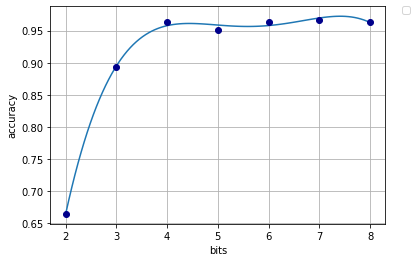

In [34]:
# plot points
fig, ax = plt.subplots()

ax.grid()
poly = np.polyfit(pruning_quant_data['bits'], pruning_quant_data['accuracy'], 4)
x = np.linspace(pruning_quant_data['bits'].min(), pruning_quant_data['bits'].max(), 100)
p = np.poly1d(poly)
plt.plot(x, p(x))
plt.plot(pruning_quant_data['bits'], pruning_quant_data['accuracy'], 'bo', color='darkblue')
plt.xlabel('bits')
plt.ylabel('accuracy')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)